<a href="https://colab.research.google.com/github/neetuaashi/NeetuSingh/blob/master/Final_Prostrate_Cancer_ANN_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/PCA_STAGE_BASED_CLASSIFICATION.xlsx')
train_data.head()

,PCA_STAGE,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
0,pT3a,7.604725,5.93074,9.28309,7.242785,7.005525,7.14975,9.247600,7.486895,7.33985,...,6.59991,7.21917,5.038410,6.37504,6.64386,7.33092,7.816270,8.062970,7.10852,2
1,N_1,6.465740,6.08746,8.97728,7.531295,7.266755,7.40939,9.919400,7.479640,7.62205,...,9.45943,6.91886,5.101065,6.84549,5.93074,7.70044,8.787070,7.266755,7.37504,0
2,pT3b,7.317235,6.58496,8.29002,7.139515,7.339600,7.63662,9.137920,7.179600,7.15987,...,6.37504,7.41785,4.649605,7.14975,6.65821,7.49985,8.611960,7.751460,7.43463,3
3,N_2,6.445800,6.85798,8.85175,7.647455,7.503820,7.82655,9.880605,7.266755,7.43463,...,7.46761,7.42626,5.409290,7.24793,6.20945,7.08746,9.476720,7.320545,7.24793,0
4,pT3a,7.021685,6.32193,8.47978,7.554565,7.441775,7.89482,9.462780,7.004740,7.05528,...,6.33985,7.15987,4.779210,6.94251,6.18982,7.62936,8.183205,6.766785,7.88264,2


Data Wrangling

In [ ]:
train_data.isnull().sum()

PCA_STAGE      0
GSHG0000008    0
GSHG0000017    0
GSHG0000018    0
GSHG0000026    0
              ..
GSHG0051591    0
GSHG0051597    0
GSHG0051601    0
GSHG0051602    0
Outcome        0
Length: 16204, dtype: int64

In [ ]:

train_data = train_data.drop(['PCA_STAGE'], axis = 1)

In [ ]:
train_data.describe(include='all')

,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,GSHG0000038,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,7.625409,6.553247,8.846202,7.372088,7.318127,7.561067,9.181256,7.390135,7.445572,7.756067,...,6.514587,7.27745,5.301960,6.799834,6.539014,7.645078,7.905435,7.511536,7.224324,1.970803
std,0.584810,0.869841,0.553860,0.290280,0.367854,0.281973,0.490373,0.239411,0.205667,0.131994,...,0.663130,0.34585,1.245742,0.283978,0.193859,0.273548,0.714546,0.932111,0.484999,1.042773
min,6.419995,4.954200,7.507790,6.820120,6.467025,6.794420,7.005525,6.693470,6.807350,7.405085,...,5.087460,6.35755,4.000000,6.022370,5.930740,6.857980,6.257360,4.599835,5.754890,0.000000
25%,7.278610,6.000000,8.471670,7.144575,7.049835,7.392320,8.929960,7.255875,7.294620,7.668845,...,6.087460,7.05528,4.488640,6.599910,6.409390,7.467610,7.446085,6.941320,6.930740,1.000000
50%,7.604725,6.442940,8.787900,7.335385,7.299490,7.562240,9.175835,7.353085,7.434630,7.748190,...,6.491850,7.31288,4.928990,6.794420,6.523560,7.686500,7.897585,7.569835,7.219170,2.000000
75%,8.102130,6.942510,9.228820,7.546890,7.566010,7.768180,9.446790,7.495585,7.569860,7.832835,...,6.845490,7.56986,5.629285,6.977280,6.672430,7.807350,8.315065,8.233610,7.539160,3.000000
max,8.897390,9.867280,10.364100,8.372390,8.424700,8.257390,10.436300,8.597620,8.060700,8.154735,...,9.459430,7.99435,9.720245,7.554590,6.977280,8.312880,9.964890,9.732690,8.379380,4.000000


In [ ]:
# to check correlation beween independent features
train_data.corr()

,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,GSHG0000038,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
GSHG0000008,1.000000,-0.122974,-0.088349,-0.374764,-0.389580,-0.261281,-0.442279,0.009938,-0.268359,0.049678,...,-0.107820,0.346219,0.266779,-0.083206,0.464599,0.225601,-0.266356,0.246763,0.096897,0.034729
GSHG0000017,-0.122974,1.000000,0.189959,0.363409,0.123600,0.024211,0.123709,-0.066141,0.193066,-0.033415,...,-0.044098,-0.011886,-0.090996,-0.061755,-0.067999,-0.004518,0.137672,0.196456,0.070474,0.235471
GSHG0000018,-0.088349,0.189959,1.000000,0.029175,0.394447,-0.177881,0.268190,0.123215,0.297356,0.341180,...,-0.068953,0.184582,0.037796,-0.365853,0.032809,0.005991,-0.313153,0.080879,-0.123534,0.213790
GSHG0000026,-0.374764,0.363409,0.029175,1.000000,0.295004,0.341352,0.346313,0.222309,0.445415,0.106378,...,-0.004080,-0.314835,-0.017155,0.096077,-0.275572,-0.277681,0.115334,-0.096748,0.141785,0.148011
GSHG0000027,-0.389580,0.123600,0.394447,0.295004,1.000000,0.252512,0.370966,0.066554,0.425165,0.233652,...,-0.251513,-0.103548,-0.133973,-0.043598,-0.296168,-0.342520,-0.082395,-0.168029,-0.186870,0.042310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSHG0051591,0.225601,-0.004518,0.005991,-0.277681,-0.342520,-0.300315,-0.333179,0.064610,-0.060204,0.028843,...,-0.064523,0.203759,0.159564,-0.050144,0.322089,1.000000,-0.145761,-0.039778,-0.050874,0.156236
GSHG0051597,-0.266356,0.137672,-0.313153,0.115334,-0.082395,0.050147,0.270701,-0.305743,-0.205116,-0.388912,...,0.459231,-0.072475,-0.142821,0.183134,-0.279899,-0.145761,1.000000,0.268502,0.337203,-0.334866
GSHG0051601,0.246763,0.196456,0.080879,-0.096748,-0.168029,-0.132528,0.174023,-0.290520,-0.223215,-0.168326,...,0.410131,0.171443,0.056445,-0.143977,0.102285,-0.039778,0.268502,1.000000,0.276451,-0.170796
GSHG0051602,0.096897,0.070474,-0.123534,0.141785,-0.186870,-0.044017,0.105326,-0.219983,-0.270288,-0.259279,...,0.323464,0.082698,0.144221,0.028864,-0.089731,-0.050874,0.337203,0.276451,1.000000,-0.244328


In [ ]:
#to test variance of data whether it is highly variable
train_data.var()

GSHG0000008    0.342003
GSHG0000017    0.756623
GSHG0000018    0.306761
GSHG0000026    0.084262
GSHG0000027    0.135316
                 ...   
GSHG0051591    0.074828
GSHG0051597    0.510577
GSHG0051601    0.868830
GSHG0051602    0.235224
Outcome        1.087377
Length: 16203, dtype: float64

In [ ]:
#plt.figure(figsize =(10,10)
#sns.heatmap(train_data.corr())

In [ ]:
train_data.shape

(137, 16203)

In [ ]:
train_data['Outcome'] = train_data['Outcome'].astype('int')


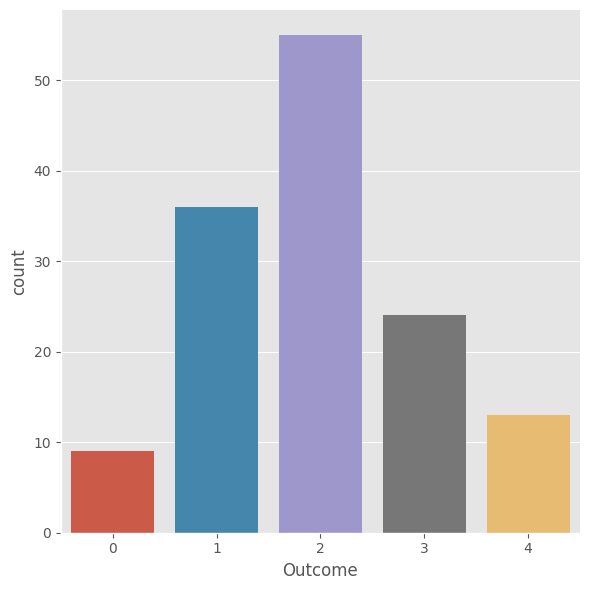

In [ ]:
# Display counts of classes
sns.catplot(x = 'Outcome', kind = "count", data = train_data, height = 6)

In [ ]:
train_data['Outcome'].value_counts()

2    55
1    36
3    24
4    13
0     9
Name: Outcome, dtype: int64

In [ ]:
# Splitting data into classes
df_0 = train_data[train_data['Outcome'] == 0]
df_1 = train_data[train_data['Outcome'] == 1]
df_2 = train_data[train_data['Outcome'] == 2]
df_3 = train_data[train_data['Outcome'] == 3]
df_4 = train_data[train_data['Outcome'] == 4]

In [ ]:
# Resample using "Bootstrapping" method to regenerate samples by upsampling for each class.
from sklearn.utils import resample

In [ ]:
df_0_upsample = resample(df_0, n_samples = 100, replace = True, random_state = 123)
df_1_upsample = resample(df_1, n_samples = 100, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 100, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 100, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 100, replace = True, random_state = 123)

In [ ]:
# Merge all dataframes to create new train samples
train_df = pd.concat([df_0_upsample, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
train_df['Outcome'].value_counts()

0    100
1    100
2    100
3    100
4    100
Name: Outcome, dtype: int64

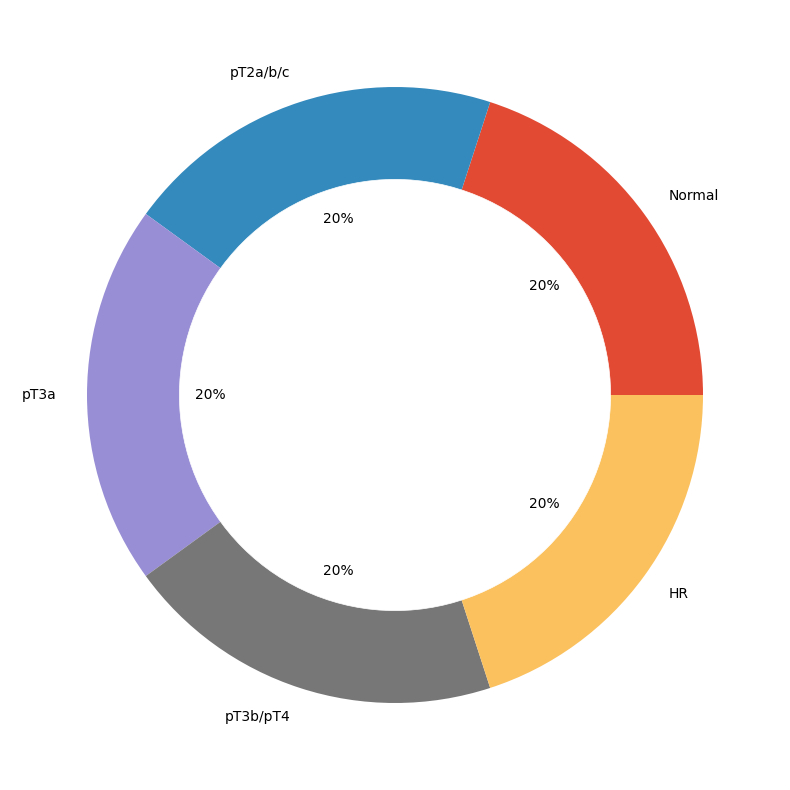

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_df['Outcome'].value_counts(), labels = ['Normal','pT2a/b/c','pT3a',
                                                  'pT3b/pT4', 'HR'], autopct = '%0.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
X = train_df.drop('Outcome', axis = 1)
Y = train_df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
# spliting of training & test is 80% to 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
x_train.shape

(400, 16202)

In [ ]:
x_test.shape

(100, 16202)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

ANN

In [ ]:
# Dense Neural Network
from tensorflow.keras.layers import Dense, Dropout
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import Adam
# Avoid Overfitting of NN by Normalizing the samples
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def build_model():
    # Sequential Neural Network - Feedforward Neural Network
    model = Sequential()
    # Units = Number of Neurons(2 * pow(n)) , Input Shape = Num of Features
    model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())

    # Hidden Layer - I
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())


    # Hidden Layer - II
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.3))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # Hidden Layer - III
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dropout(0.3))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())

    # Hidden Layer - IV
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dropout(0.3))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # Optimizers (alpha)
    optimizers = Adam(learning_rate = 0.001)

    # Model Compiler
    # Error Function for multi-class classification = 'categorical_crossentropy'
    # Metrics = Metrics of Model / Check the performance of model
    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

model = build_model()

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1036992   
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_17 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_18 (Bat  (None, 128)              512       
 chNormalization)                                     

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/100
13/13 [==============================] - 5s 78ms/step - loss: 2.2956 - accuracy: 0.2100 - val_loss: 1.6109 - val_accuracy: 0.1900
Epoch 2/100
13/13 [==============================] - 0s 30ms/step - loss: 2.2771 - accuracy: 0.2175 - val_loss: 1.6140 - val_accuracy: 0.2000
Epoch 3/100
13/13 [==============================] - 0s 28ms/step - loss: 2.2012 - accuracy: 0.1900 - val_loss: 1.6209 - val_accuracy: 0.2000
Epoch 4/100
13/13 [==============================] - 0s 35ms/step - loss: 2.1403 - accuracy: 0.1850 - val_loss: 1.6241 - val_accuracy: 0.2000
Epoch 5/100
13/13 [==============================] - 0s 32ms/step - loss: 2.1047 - accuracy: 0.2175 - val_loss: 1.6227 - val_accuracy: 0.2000
Epoch 6/100
13/13 [==============================] - 0s 32ms/step - loss: 1.9470 - accuracy: 0.2125 - val_loss: 1.6241 - val_accuracy: 0.2000
Epoch 7/100
13/13 [==============================] - 0s 30ms/step - loss: 2.0298 - accuracy: 0.2075 - val_loss: 1.6309 - val_accuracy: 0.1900
Epoch 

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.295631,0.2100,1.610934,0.19
1,2.277076,0.2175,1.614047,0.20
2,2.201239,0.1900,1.620894,0.20
3,2.140272,0.1850,1.624073,0.20
4,2.104749,0.2175,1.622740,0.20
...,...,...,...,...
95,1.234097,0.4800,2.776348,0.23
96,1.248090,0.4350,2.776900,0.23
97,1.167543,0.4575,2.980155,0.23
98,1.218414,0.4475,2.980558,0.23


<Axes: >

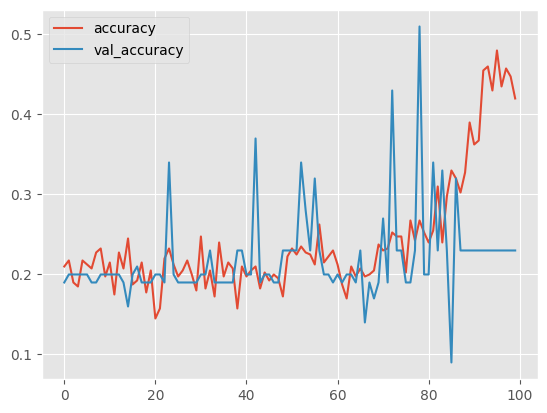

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

<Axes: >

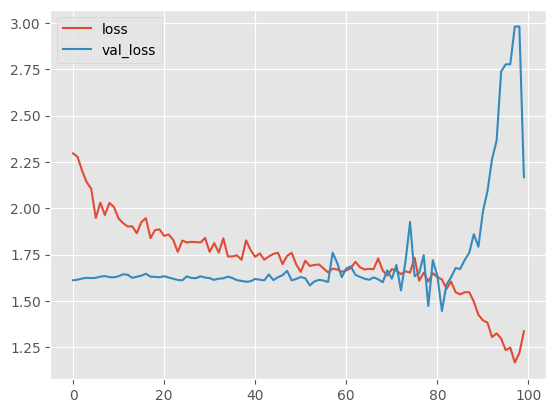

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
# Classification Report

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 2.1671 - accuracy: 0.2300


[2.16713809967041, 0.23000000417232513]

In [ ]:
# Make Prediction
predict = model.predict(x_test)

4/4 [==============================] - 0s 7ms/step


In [ ]:
predict

array([[0.04747844, 0.06023596, 0.11759913, 0.1843728 , 0.59031373],
       [0.06449355, 0.08443055, 0.16034052, 0.20262301, 0.48811224],
       [0.06634724, 0.08702707, 0.16464894, 0.20387754, 0.47809926],
       [0.05635215, 0.0728214 , 0.13965327, 0.19398217, 0.53719103],
       [0.05368048, 0.06892873, 0.1328838 , 0.19096062, 0.55354637],
       [0.06789862, 0.08932134, 0.16852708, 0.20505925, 0.46919364],
       [0.02013955, 0.02395004, 0.05554133, 0.14763783, 0.75273114],
       [0.06427978, 0.08413406, 0.15984748, 0.20247674, 0.48926193],
       [0.06397917, 0.08371317, 0.15914887, 0.20225994, 0.49089876],
       [0.06558567, 0.08596156, 0.16286467, 0.20335118, 0.48223692],
       [0.06819993, 0.08977692, 0.16927005, 0.2052825 , 0.4674707 ],
       [0.05624518, 0.07266675, 0.139377  , 0.19385535, 0.5378557 ],
       [0.04715941, 0.05980699, 0.11682048, 0.18403511, 0.59217805],
       [0.03314114, 0.04137896, 0.08379442, 0.16695252, 0.674733  ],
       [0.05210298, 0.06664041, 0.

In [ ]:
yhat = np.argmax(predict, axis = 1)

In [ ]:
# Distributed probability to discrete class
yhat = np.argmax(predict, axis = 1)
yhat

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
y_test=np.argmax(predict, axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix( yhat, y_test)

array([[100]])

<Axes: >

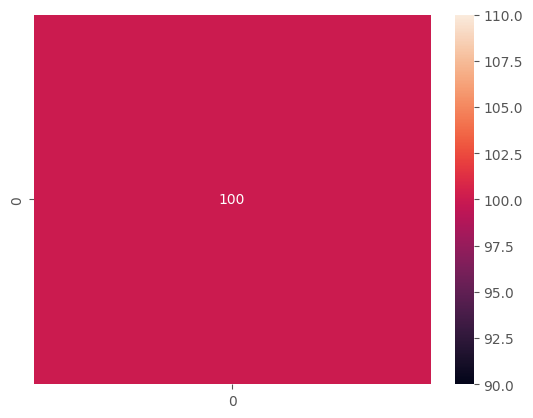

In [ ]:
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt='0.0f')

In [ ]:
print(classification_report(yhat, y_test))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

